In [1]:
pip install pandas, numpy, plotly, statsmodels, scipy, statsmodels, scypy, openpyxl, xlsxwriter, xlrd, openpyxl, scikit-learn, matplotlib, seaborn  

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: 'pandas,': Expected end or semicolon (after name and no valid version specifier)
    pandas,
          ^


In [18]:
import pandas as pd
import numpy as np      
import os
import sys  
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.subplots as sp
import plotly.figure_factory as ff
import plotly
# Removed incorrect import of scypy
import scipy.stats as stats
import statsmodels.api as sm
import scipy
import warnings
warnings.filterwarnings("ignore")


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import Seaborn

plt.style.use('ggplot')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 4)
plt.rcParams['font.size'] = 12

In [4]:
# Ensure pandas is imported
import pandas as pd

df = pd.read_csv(r'C:\cursopython\entorno_upgrade\notebook\student_habits_performance.csv')

In [6]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

###crear una funcion que selecciones las columnas que son objeto y nos devuelva los varlores unicos que tiene cada uno de ellas ###

In [10]:
def unique_values(df, cols):
    for col in cols:
        if df[col].dtype == 'object':  
            print(f"Unique values in {col}:")
            print(df[col].unique())
            print("\n")
 
 
# No usamos la primera columna porque es el id del estudiante y no tiene sentido ver los valores únicos de esa columna
unique_values(df, df.columns[1:])

Unique values in gender:
['Female' 'Male' 'Other']


Unique values in part_time_job:
['No' 'Yes']


Unique values in diet_quality:
['Fair' 'Good' 'Poor']


Unique values in parental_education_level:
['Master' 'High School' 'Bachelor' nan]


Unique values in internet_quality:
['Average' 'Poor' 'Good']


Unique values in extracurricular_participation:
['Yes' 'No']




In [14]:
df.isnull().sum() / len(df) * 100

student_id                       0.0
age                              0.0
gender                           0.0
study_hours_per_day              0.0
social_media_hours               0.0
netflix_hours                    0.0
part_time_job                    0.0
attendance_percentage            0.0
sleep_hours                      0.0
diet_quality                     0.0
exercise_frequency               0.0
parental_education_level         9.1
internet_quality                 0.0
mental_health_rating             0.0
extracurricular_participation    0.0
exam_score                       0.0
dtype: float64

###cambiar los valores nan a sin datos en parental_education_level###

In [15]:
# Reemplazar NaN por "sin datos" en parental_education_level
df['parental_education_level'] = df['parental_education_level'].fillna('sin datos')

# Verificar el cambio
print("Valores únicos en parental_education_level después del cambio:")
print(df['parental_education_level'].unique())

# Verificar que no quedan valores nulos
print("\nPorcentaje de valores nulos:")
print(df['parental_education_level'].isnull().sum() / len(df) * 100, "%")

Valores únicos en parental_education_level después del cambio:
['Master' 'High School' 'Bachelor' 'sin datos']

Porcentaje de valores nulos:
0.0 %


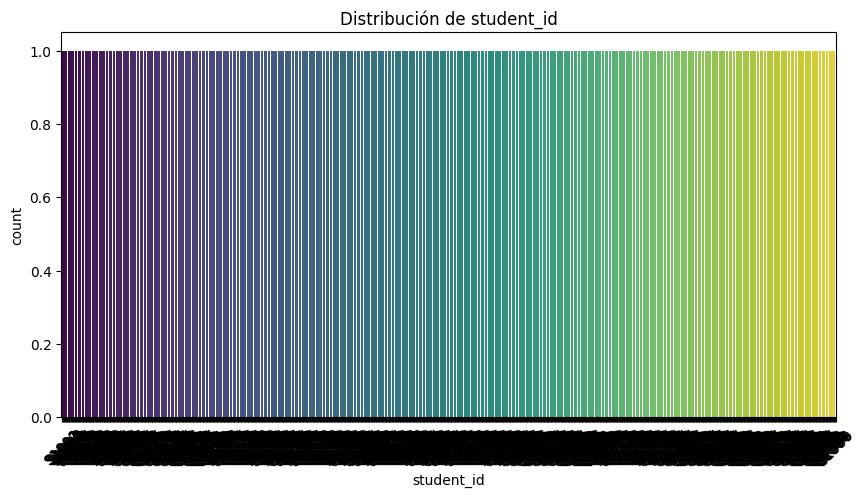

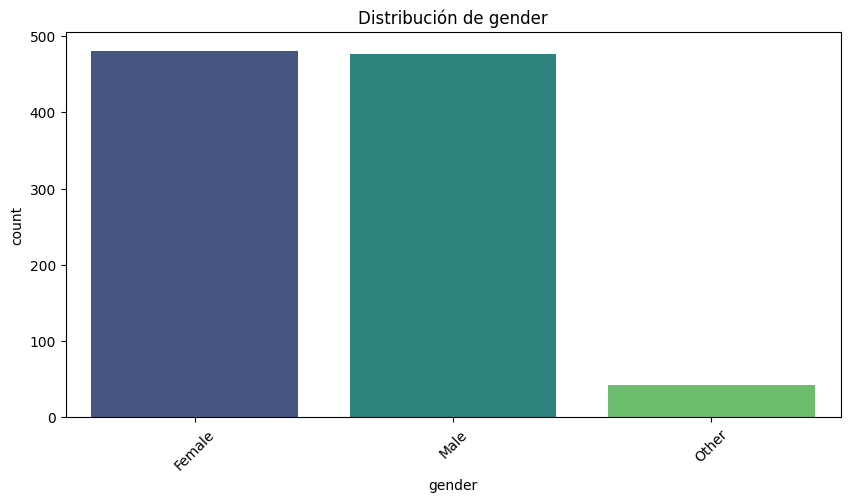

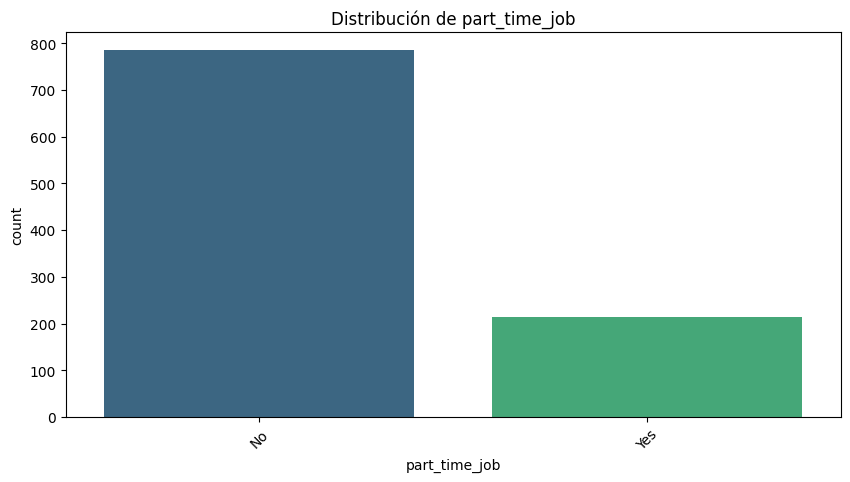

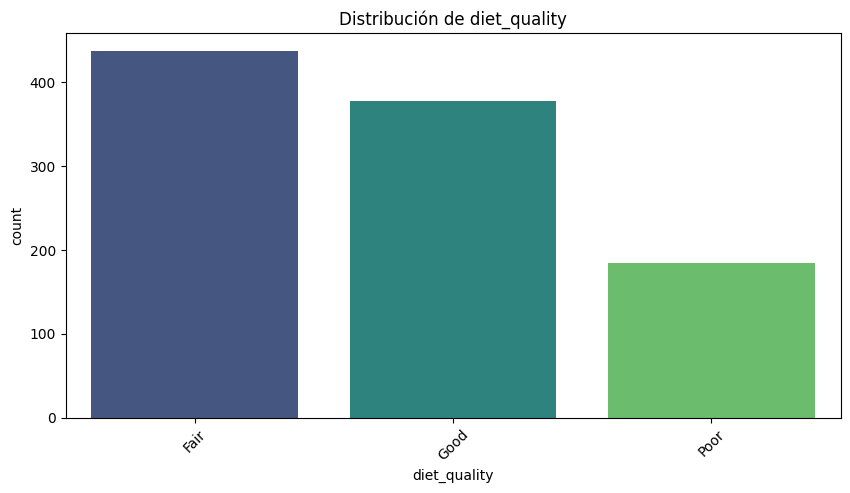

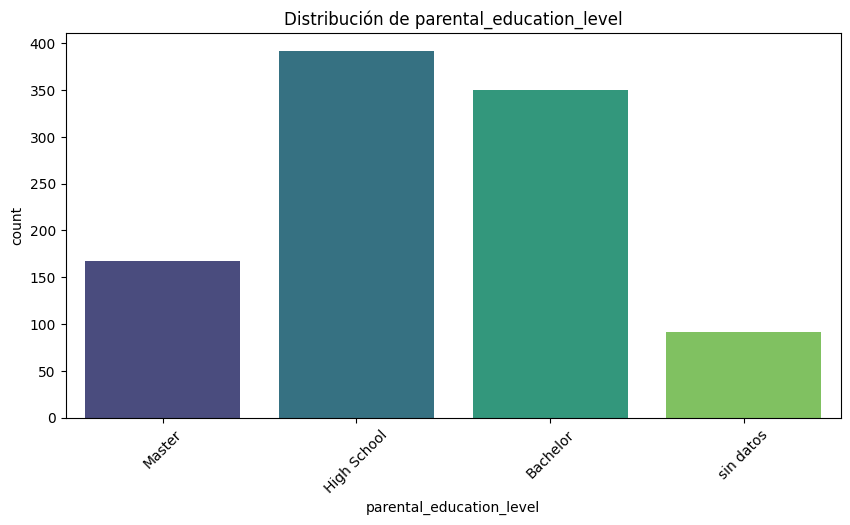

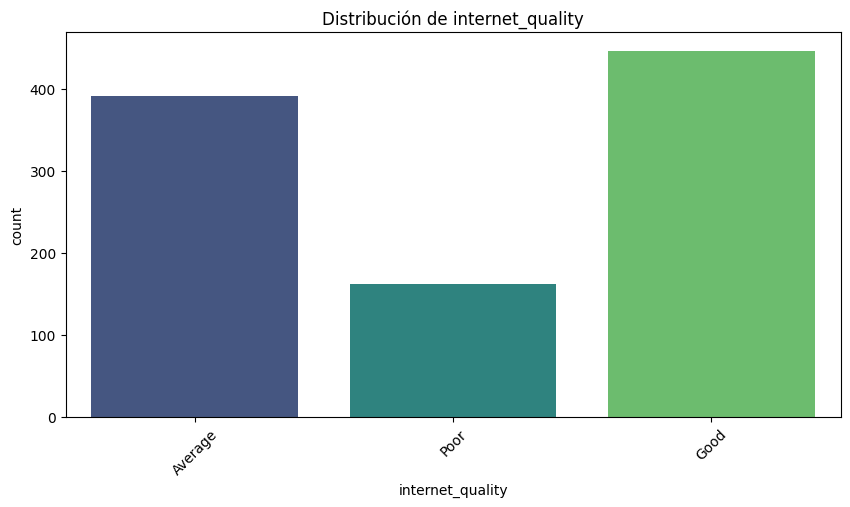

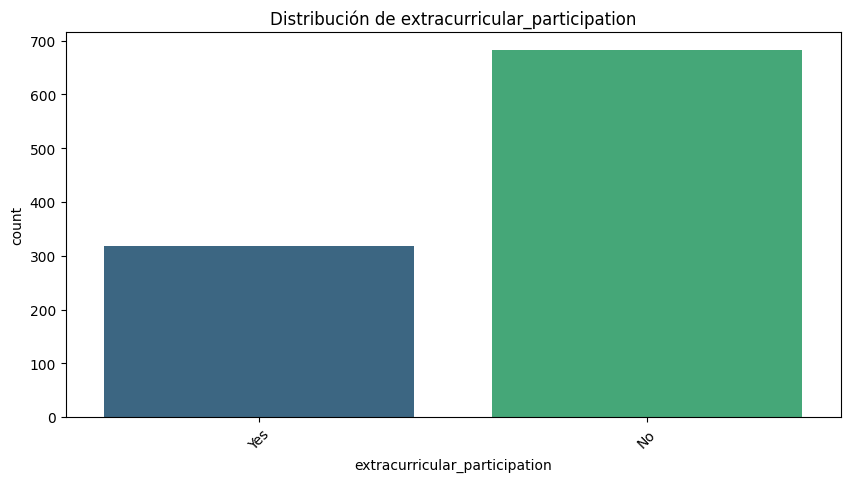

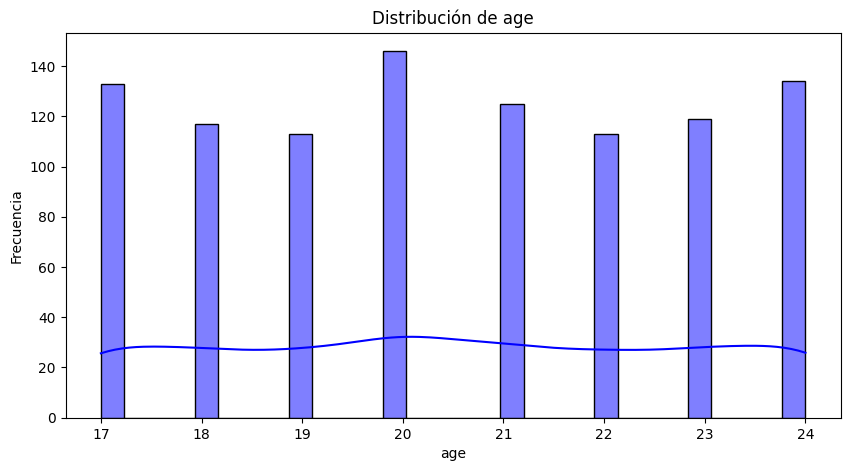

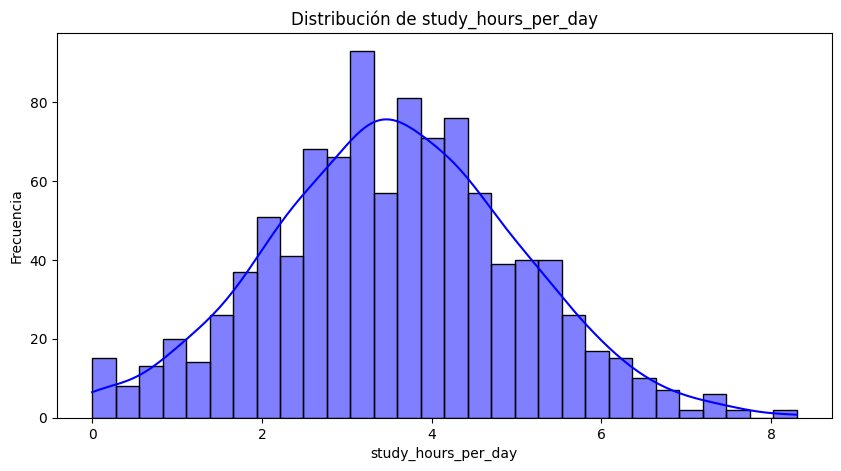

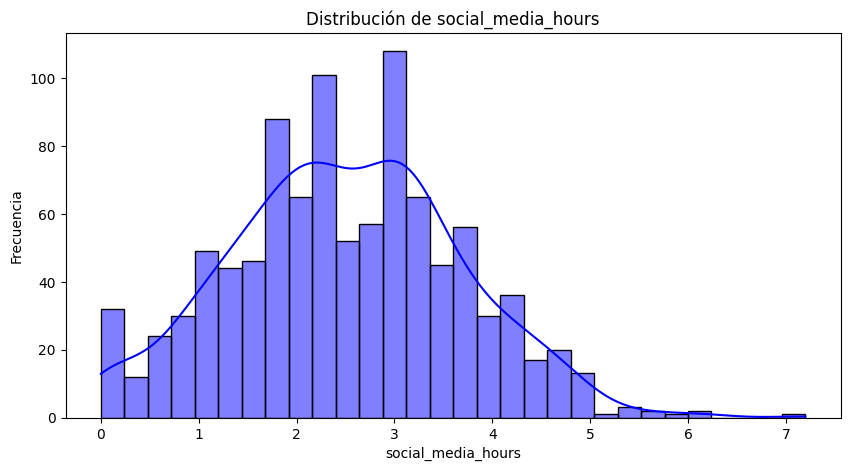

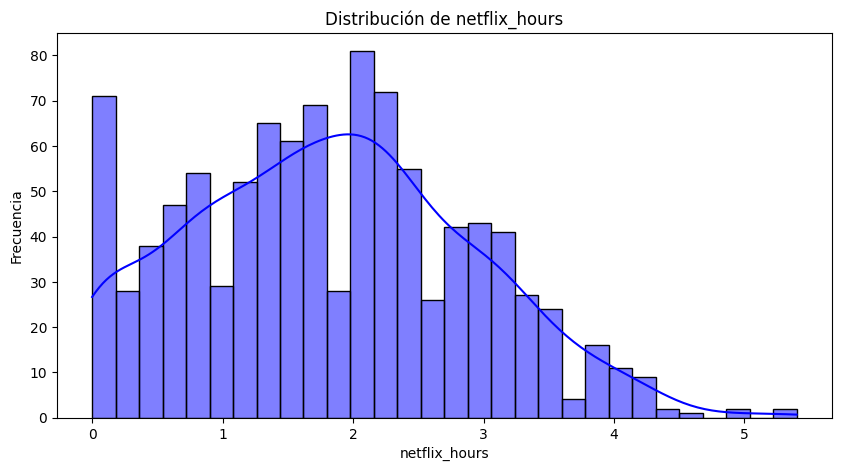

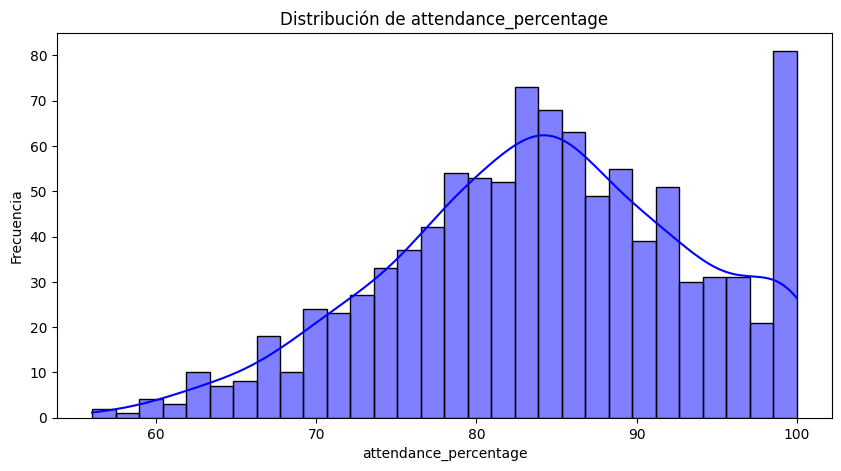

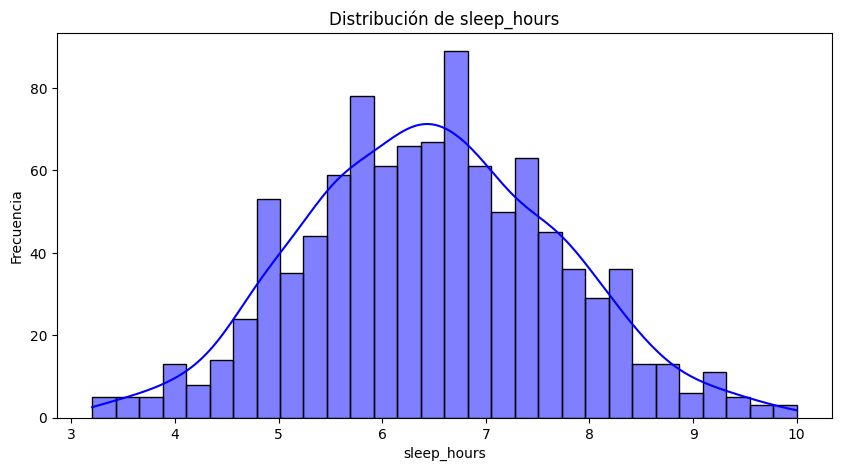

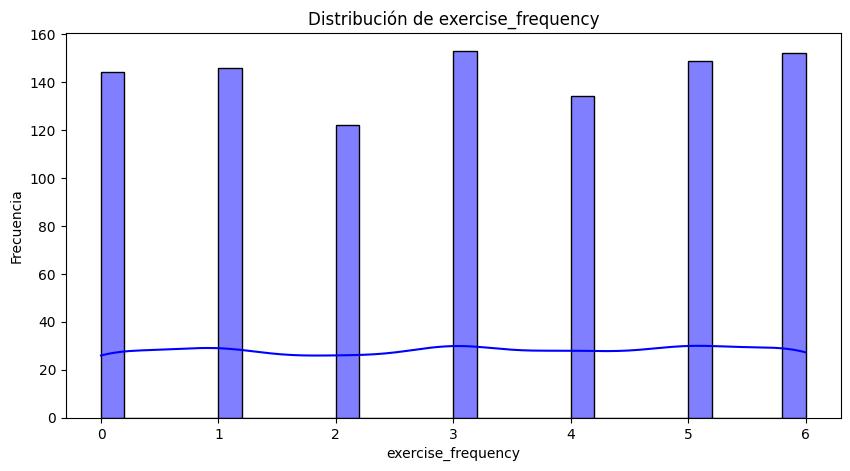

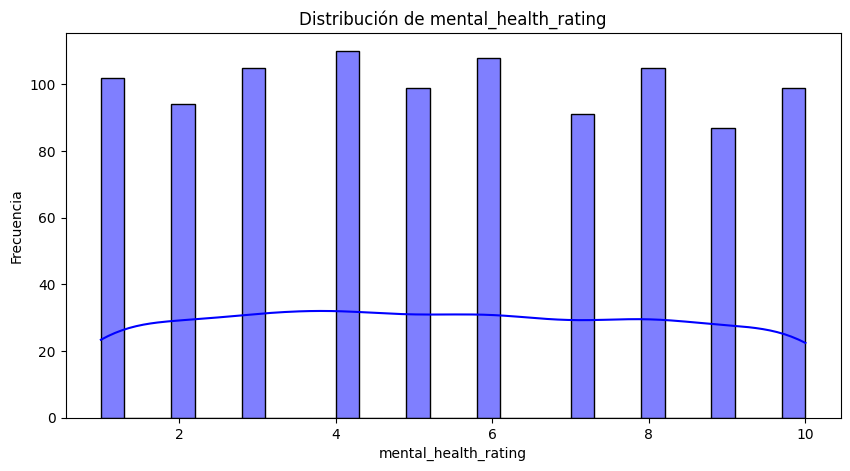

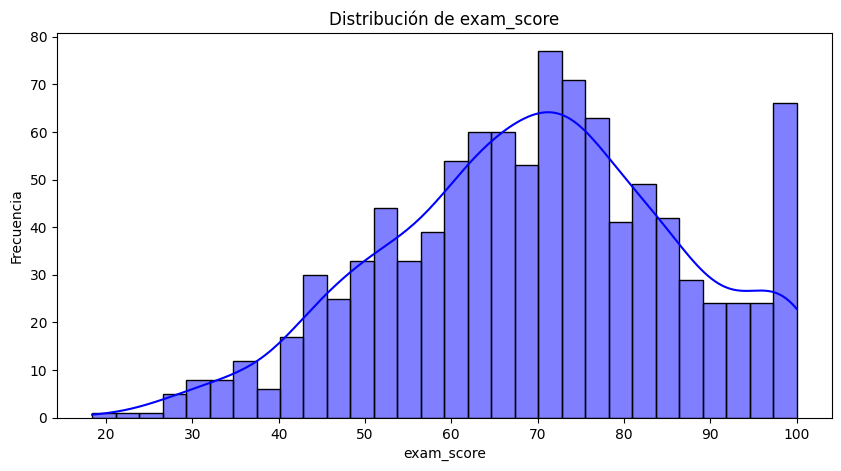

In [26]:
# Ensure plt and sns are defined
import seaborn as sns

def plot_categorical_distribution(df, col):
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.show()
    
def plot_numerical_distribution(df, col):
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=col, kde=True, color='blue', bins=30)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()


categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

for col in categorical_cols:
    plot_categorical_distribution(df, col)
for col in numerical_cols:
    plot_numerical_distribution(df, col)

EDA

### Relación entre horas de estudio y calificaciones###

In [33]:
def calcular_correlacion(df, col_x, col_y):
    """
    Calcula la correlación de Pearson entre dos columnas de un DataFrame.

    Args:
        df (pd.DataFrame): El DataFrame que contiene los datos.
        col_x (str): El nombre de la columna X.
        col_y (str): El nombre de la columna Y.

    Returns:
        float: El coeficiente de correlación de Pearson.
    """
    correlacion = df[[col_x, col_y]].corr(method='pearson').iloc[0, 1]
    print(f"La correlación entre {col_x} y {col_y} es: {correlacion}")
    return correlacion

# Usar la función para calcular la correlación entre horas de estudio y calificaciones
calcular_correlacion(df, 'study_hours_per_day', 'exam_score')

# grafico de muestra de datos
px.scatter(df, x='study_hours_per_day', y='exam_score')


La correlación entre study_hours_per_day y exam_score es: 0.8254185093960438


# Relación entre horas en redes sociales y calificaciones

In [34]:
# Usar la función para calcular la correlación entre horas en redes sociales y calificaciones
calcular_correlacion(df, 'social_media_hours', 'exam_score')

# Gráfico de dispersión para visualizar la relación
px.scatter(df, x='social_media_hours', y='exam_score', title='Relación entre horas en redes sociales y calificaciones')


La correlación entre social_media_hours y exam_score es: -0.1667328851086163


# Relación entre horas de Netflix y calificaciones

In [35]:
calcular_correlacion(df, 'netflix_hours', 'exam_score')

# Gráfico de dispersión para visualizar la relación
px.scatter(df, x='netflix_hours', y='exam_score', title='Relación entre horas en Netflix y calificaciones') 


La correlación entre netflix_hours y exam_score es: -0.17177923845531576


# Relación entre horas de sueño y calificaciones

In [40]:
calcular_correlacion(df, 'sleep_hours', 'exam_score')

# Gráfico de dispersión para visualizar la relación
px.scatter(df, x='sleep_hours', y='exam_score', title='Relación entre horas soñando y calificaciones')  


La correlación entre sleep_hours y exam_score es: 0.12168291063768033


# Compara calificaciones por género

In [44]:
# Convertir la columna 'gender' a valores numéricos
df['gender_numeric'] = df['gender'].map({'Female': 0, 'Male': 1, 'Other': 2})

# Calcular la correlación entre 'gender_numeric' y 'exam_score'
calcular_correlacion(df, 'gender_numeric', 'exam_score')

# Gráfico de caja para visualizar la relación
px.box(df, x='gender', y='exam_score', title='Distribución de calificaciones por género', 
    labels={'gender': 'Género', 'exam_score': 'Calificaciones'})


La correlación entre gender_numeric y exam_score es: -0.002406095246984852


# Compara calificaciones por trabajo de medio tiempo

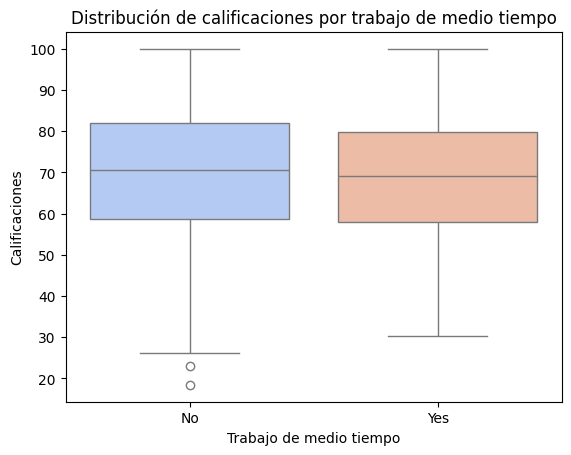

In [51]:
# Crear un boxplot para comparar calificaciones según trabajo de medio tiempo
sns.boxplot(data=df, x='part_time_job', y='exam_score', palette='coolwarm')
plt.title('Distribución de calificaciones por trabajo de medio tiempo')
plt.xlabel('Trabajo de medio tiempo')
plt.ylabel('Calificaciones')
plt.show()


# Compara calificaciones por calidad de dieta

In [50]:
# Convertir la columna 'diet_quality' a valores numéricos
df['diet_quality_numeric'] = df['diet_quality'].map({'Poor': 0, 'Fair': 1, 'Good': 2})

# Calcular la correlación entre 'diet_quality_numeric' y 'exam_score'
calcular_correlacion(df, 'diet_quality_numeric', 'exam_score')

# Gráfico de dispersión para visualizar la relación     
px.scatter(df, x='diet_quality_numeric', y='exam_score', title='Relación entre calidad de la dieta y calificaciones',
           labels={'diet_quality_numeric': 'Calidad de la dieta (numérica)', 'exam_score': 'Calificaciones'})

# Gráfico de caja para visualizar la relación
px.box(df, x='diet_quality', y='exam_score', title='Distribución de calificaciones por calidad de la dieta',
       labels={'diet_quality': 'Calidad de la dieta', 'exam_score': 'Calificaciones'})

La correlación entre diet_quality_numeric y exam_score es: 0.01501774745066283


# Compara calificaciones por participación extracurricular

In [53]:
# Convertir la columna 'extracurricular_participation' a valores numéricos
df['extracurricular_participation_numeric'] = df['extracurricular_participation'].map({'Yes': 1, 'No': 0})

# Calcular la correlación entre 'extracurricular_participation_numeric' y 'exam_score'
calcular_correlacion(df, 'extracurricular_participation_numeric', 'exam_score')

# Gráfico de dispersión para visualizar la relación
px.scatter(df, x='extracurricular_participation_numeric', y='exam_score', title='Relación entre participación extracurricular y calificaciones',
           labels={'extracurricular_participation_numeric': 'Participación extracurricular (numérica)', 'exam_score': 'Calificaciones'})

# Gráfico de caja para visualizar la relación
px.box(df, x='extracurricular_participation', y='exam_score', title='Distribución de calificaciones por participación extracurricular',
       labels={'extracurricular_participation': 'Participación extracurricular', 'exam_score': 'Calificaciones'})

La correlación entre extracurricular_participation_numeric y exam_score es: 0.000880669829363913


###no existe correlación entre calificaciones y participación extracurricular. No influye la participación extracurricular en las calificaciones.### 

ANALISIS MULTIVARIABLE

# Análisis por grupos: calidad de dieta y horas de estudio vs calificaciones

In [56]:
# Crear un scatter plot con color según la calidad de la dieta
fig = px.scatter(df, 
                 x='study_hours_per_day', 
                 y='exam_score',
                 color='diet_quality',
                 title='Relación entre horas de estudio y calificaciones por calidad de dieta',
                 labels={
                     'study_hours_per_day': 'Horas de estudio por día',
                     'exam_score': 'Calificación del examen',
                     'diet_quality': 'Calidad de dieta'
                 })

fig.show()

# Calcular estadísticas por grupo de calidad de dieta
stats_by_diet = df.groupby('diet_quality').agg({
    'study_hours_per_day': ['mean', 'std'],
    'exam_score': ['mean', 'std', 'count']
}).round(2)

print("\nEstadísticas por grupo de calidad de dieta:")
print(stats_by_diet)

# Calcular correlación entre horas de estudio y calificaciones para cada grupo de dieta
for diet_quality in df['diet_quality'].unique():
    subset = df[df['diet_quality'] == diet_quality]
    corr = subset['study_hours_per_day'].corr(subset['exam_score'])
    print(f"\nCorrelación para dieta {diet_quality}: {corr:.3f}")
    # Agregar la correlación al gráfico
    fig_corr = px.scatter(subset, 
                          x='study_hours_per_day', 
                          y='exam_score',
                          title=f'Relación entre horas de estudio y calificaciones para dieta {diet_quality} (Correlación: {corr:.3f})',
                          labels={
                              'study_hours_per_day': 'Horas de estudio por día',
                              'exam_score': 'Calificación del examen'
                          })
    fig_corr.show()

# Crear un boxplot para ver la distribución de calificaciones por calidad de dieta
fig2 = px.box(df, 
              x='diet_quality', 
              y='exam_score',
              title='Distribución de calificaciones por calidad de dieta',
              labels={
                  'diet_quality': 'Calidad de dieta',
                  'exam_score': 'Calificación del examen'
              })

fig2.show()

# Realizar un ANOVA para verificar si hay diferencias significativas
from scipy import stats

# Crear grupos para ANOVA
poor_scores = df[df['diet_quality'] == 'Poor']['exam_score']
fair_scores = df[df['diet_quality'] == 'Fair']['exam_score']
good_scores = df[df['diet_quality'] == 'Good']['exam_score']

# Realizar ANOVA
f_stat, p_value = stats.f_oneway(poor_scores, fair_scores, good_scores)
print(f"\nResultados ANOVA:")
print(f"F-statistic: {f_stat:.3f}")
print(f"p-value: {p_value:.3f}")


Estadísticas por grupo de calidad de dieta:
             study_hours_per_day       exam_score             
                            mean   std       mean    std count
diet_quality                                                  
Fair                        3.64  1.46      70.43  16.65   437
Good                        3.54  1.45      69.37  17.07   378
Poor                        3.34  1.52      68.13  17.06   185

Correlación para dieta Fair: 0.814



Correlación para dieta Good: 0.825



Correlación para dieta Poor: 0.851



Resultados ANOVA:
F-statistic: 1.266
p-value: 0.282


# Análisis por grupos: participación extracurricular y horas de estudio vs calificaciones

In [57]:
# Crear un scatter plot con color según la participación extracurricular
fig = px.scatter(df, 
                 x='study_hours_per_day', 
                 y='exam_score',
                 color='extracurricular_participation',
                 title='Relación entre horas de estudio y calificaciones por participación extracurricular',
                 labels={
                     'study_hours_per_day': 'Horas de estudio por día',
                     'exam_score': 'Calificación del examen',
                     'extracurricular_participation': 'Participación extracurricular'
                 })

fig.show()

# Calcular estadísticas por grupo de participación extracurricular
stats_by_extra = df.groupby('extracurricular_participation').agg({
    'study_hours_per_day': ['mean', 'std'],
    'exam_score': ['mean', 'std', 'count']
}).round(2)

print("\nEstadísticas por grupo de participación extracurricular:")
print(stats_by_extra)

# Calcular correlación entre horas de estudio y calificaciones para cada grupo
for participation in df['extracurricular_participation'].unique():
    subset = df[df['extracurricular_participation'] == participation]
    corr = subset['study_hours_per_day'].corr(subset['exam_score'])
    print(f"\nCorrelación para participación {participation}: {corr:.3f}")
    
    # Crear gráfico de dispersión para cada grupo
    fig_corr = px.scatter(subset, 
                         x='study_hours_per_day', 
                         y='exam_score',
                         title=f'Relación entre horas de estudio y calificaciones para participación {participation} (Correlación: {corr:.3f})',
                         labels={
                             'study_hours_per_day': 'Horas de estudio por día',
                             'exam_score': 'Calificación del examen'
                         })
    fig_corr.show()

# Crear un boxplot para ver la distribución de calificaciones
fig2 = px.box(df, 
              x='extracurricular_participation', 
              y='exam_score',
              title='Distribución de calificaciones por participación extracurricular',
              labels={
                  'extracurricular_participation': 'Participación extracurricular',
                  'exam_score': 'Calificación del examen'
              })

fig2.show()

# Realizar prueba t de Student para comparar los grupos
yes_scores = df[df['extracurricular_participation'] == 'Yes']['exam_score']
no_scores = df[df['extracurricular_participation'] == 'No']['exam_score']

t_stat, p_value = stats.ttest_ind(yes_scores, no_scores)
print(f"\nResultados prueba t de Student:")
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.3f}")


Estadísticas por grupo de participación extracurricular:
                              study_hours_per_day       exam_score         \
                                             mean   std       mean    std   
extracurricular_participation                                               
No                                           3.55  1.44      69.59  16.70   
Yes                                          3.54  1.53      69.62  17.31   

                                     
                              count  
extracurricular_participation        
No                              682  
Yes                             318  

Correlación para participación Yes: 0.823



Correlación para participación No: 0.827



Resultados prueba t de Student:
t-statistic: 0.028
p-value: 0.978


# Análisis por grupos: horas de sueño, salud mental y calificaciones

In [69]:
# Gráfico de dispersión para cada grupo
fig_corr = px.scatter(subset, 
                     x='sleep_hours', 
                     y='exam_score',
                     title=f'Relación entre horas de sueño y calificaciones para salud mental {mental_state} (Correlación: {corr:.3f})',
                     labels={
                         'sleep_hours': 'Horas de sueño',
                         'exam_score': 'Calificación del examen'
                     })
fig_corr.show()
